# Homework 3

## Your Name Here (or your names here if you are pair programming)
David Paul Salinas (dps2387), 
Ethan Mikel

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [24]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

              count unique              top freq
participation                                   
No               23     23  nonparticipants    1
Yes              26     26     participants    1


<Figure size 800x500 with 0 Axes>

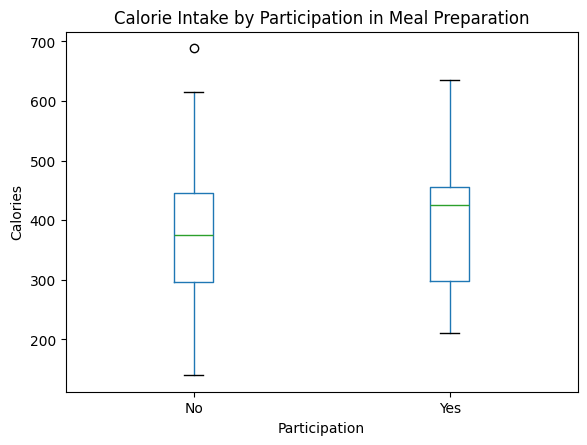

In [25]:
nonparticipants = pd.read_csv("nonparticipants.csv", header=None, names=["calorie_intake"])
participants = pd.read_csv("participants.csv", header=None, names=["calorie_intake"])

nonparticipants["participation"] = "No"
participants["participation"] = "Yes"

both_sets = pd.concat([nonparticipants, participants], ignore_index=True)
print(both_sets.groupby("participation")["calorie_intake"].describe())

both_sets["calorie_intake"] = pd.to_numeric(both_sets["calorie_intake"], errors="coerce")

plt.figure(figsize=(8,5))
both_sets.boxplot(column="calorie_intake", by="participation", grid=False)
plt.title("Calorie Intake by Participation in Meal Preparation")
plt.xlabel("Participation")
plt.ylabel("Calories")
plt.suptitle("")
plt.show()

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [26]:
participants_data = participants["calorie_intake"]
participants_data = pd.to_numeric(participants_data, errors="coerce")

sample_mean = participants_data.mean()
sample_std = participants_data.std()
n = len(participants_data)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Std Dev: {sample_std}")

mean_under_null = 425

t_stat = (sample_mean - mean_under_null) / (sample_std / (n ** 0.5))
p_val = 2 * sp.stats.t.cdf(-abs(t_stat), df=n-1)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

Sample Mean: 410.0795999999999
Sample Std Dev: 121.51378616848379
t-statistic: -0.6260969487455772
p-value: 0.536926382991219


With a t-statistic of -0.6261 and a p-value of 0.5369, the p-value is greater than the significance level (α = 0.05). Therefore, we fail to reject the null hypothesis.

# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [27]:
participants["calorie_intake"] = pd.to_numeric(participants["calorie_intake"], errors="coerce")
participants = participants.dropna(subset=["calorie_intake"])

sample_data = participants["calorie_intake"]

sample_mean = sample_data.mean()
sample_std = sample_data.std()
n = len(sample_data)

standard_error = sample_std / np.sqrt(n)
z_score = sp.stats.norm.ppf(1 - (1 - 0.9) / 2)
margin_of_error = z_score * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"The 90% confidence interval is: ({lower_bound:.2f}, {upper_bound:.2f})")

The 90% confidence interval is: (370.11, 450.05)


We are 90% confident that the true mean calorie intake for participants in the meal preparation program falls between 370.11 and 450.05 calories.

In [28]:
# Add your code or descriptions here 

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [29]:
non_participants_data = nonparticipants["calorie_intake"]

if isinstance(non_participants_data.iloc[0], str):
    non_participants_data = non_participants_data.str.split(r'[^0-9.]+', expand=True).stack()
    non_participants_data = pd.to_numeric(non_participants_data, errors='coerce')

non_participants_data = non_participants_data.dropna()

mean_participants = participants_data.mean()
std_participants = participants_data.std()
n_participants = len(participants_data)

mean_non_participants = non_participants_data.mean()
std_non_participants = non_participants_data.std()
n_non_participants = len(non_participants_data)

se_diff = np.sqrt((std_participants ** 2 / n_participants) + (std_non_participants ** 2 / n_non_participants))

t_stat = (mean_participants - mean_non_participants) / se_diff

df = ((std_participants ** 2 / n_participants + std_non_participants ** 2 / n_non_participants) ** 2) / \
     (((std_participants ** 2 / n_participants) ** 2 / (n_participants - 1)) + \
      ((std_non_participants ** 2 / n_non_participants) ** 2 / (n_non_participants - 1)))

p_value = 1 - sp.stats.t.cdf(t_stat, df)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: 0.9715
p-value: 0.1684


Based on the hypothesis test, we obtained a t-statistic of 0.9715 and a p-value of 0.1684. Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis.